In [21]:
library(dplyr)
library(urltools)
library(ggplot2)
library(tldextract)

In [31]:
es <- read.table("../../btc/qrels/SemSearch_ES.txt", sep = "\t", quote = "", comment.char = "", as.is = TRUE, header = FALSE, col.names=c("qid","run","url","rel"))
ls <- read.table("../../btc/qrels/SemSearch_LS.txt", sep = "\t", quote = "", comment.char = "", as.is = TRUE, header = FALSE, col.names=c("qid","run","url","rel"))
ss <- bind_rows(es,ls) %>% distinct(url)
ss$domain <- domain(ss$url)
domain.info <- tldextract(ss$domain)
ss$pld <- paste(domain.info$domain, domain.info$tld, sep=".")
ss.relevant <- ss %>% filter(rel > 0)
domain.counts <- ss.relevant %>% group_by(pld) %>% summarise(count = n()) %>% arrange(-count)

# SemSearch top domains for relevant entities

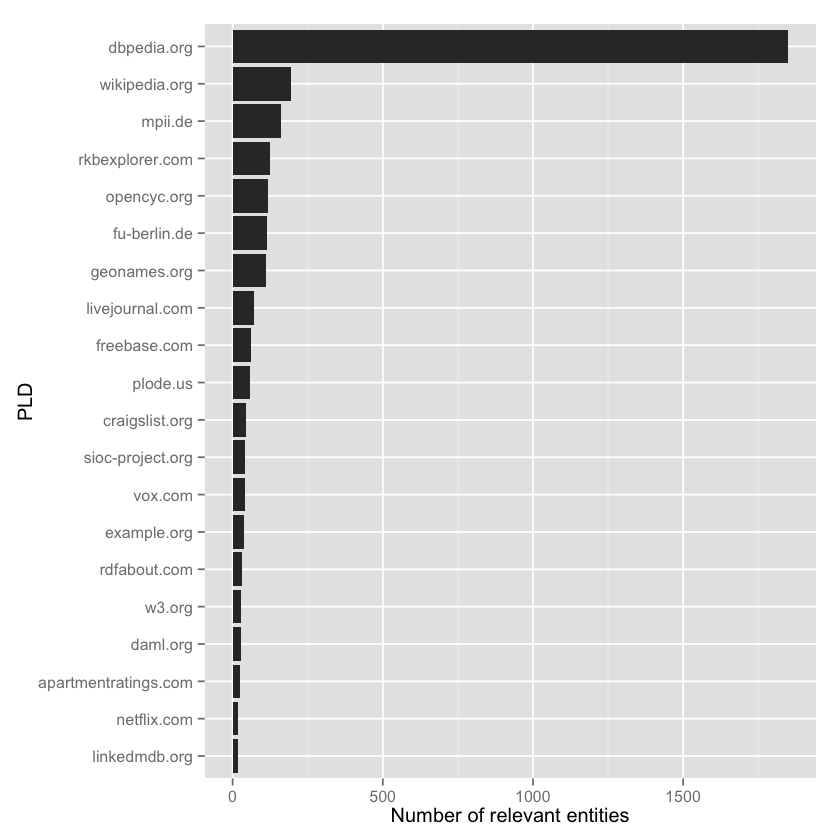

In [32]:
ggplot(domain.counts[0:20,], aes(x=reorder(pld,count), y=count)) +
  geom_bar(stat="identity") + coord_flip() + ylab("Number of relevant entities") + xlab("PLD")

# Ratio of relevant DBpedia entities

In [33]:
sum(ss.relevant$domain == "dbpedia.org") / dim(ss.relevant)[1]

[1] 0.4890299

# Top domains in BTC 2009

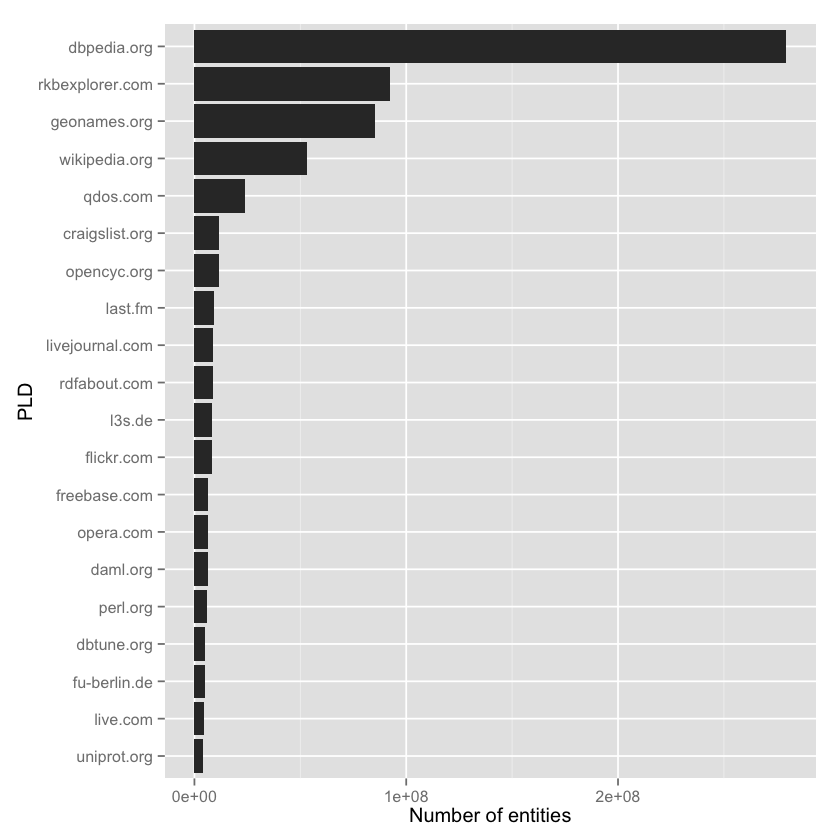

In [34]:
btc.domain.counts <- read.table("btc-counts", sep = "\t", quote = "", comment.char = "", as.is = TRUE, header = FALSE, col.names=c("domain","count")) %>% arrange(-count)
ggplot(btc.domain.counts[0:20,], aes(x=reorder(domain,count), y=count)) +
  geom_bar(stat="identity") + coord_flip() + ylab("Number of entities") + xlab("PLD")

## Ratio of DBpedia in BTC-2009

In [35]:
btc.domain.counts[btc.domain.counts$domain == "dbpedia.org",]$count / sum(btc.domain.counts$count)

[1] 0.3462166